# Tarea 3

## Primera fase - Pre Procesado 

Durante esta fase se empieza con la carga de los datos, posteriormente descripción de las variables y si tenemos datos perdidos o NA. 

Posteriormente ante esa presencia se hace un estudio de las variables y se trata de lidiar con los datos perdidos, ya sea por metodos de estimación de los datos o si descarta del todo las observaciones

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("wineQualityReds.xls")

In [5]:
df.shape

(1599, 13)

In [6]:
df.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

Lo primero que podemos observar es que la base tiene 13 columnas de las cuales la columna unamed se refiere al indice y por tanto la podemos eleminar del conjunto de datos

In [7]:
df = df.drop("Unnamed: 0", axis=1)


In [8]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.shape

(1599, 12)

Ahora que tenemos los datos un poco más limpios podemos proceder a observar si existen valores perdidos

In [10]:
df.isnull().values.any()

False

Como dentro del data set no existen valores perdidos podemos continuar con un análisis descriptivo de los datos 

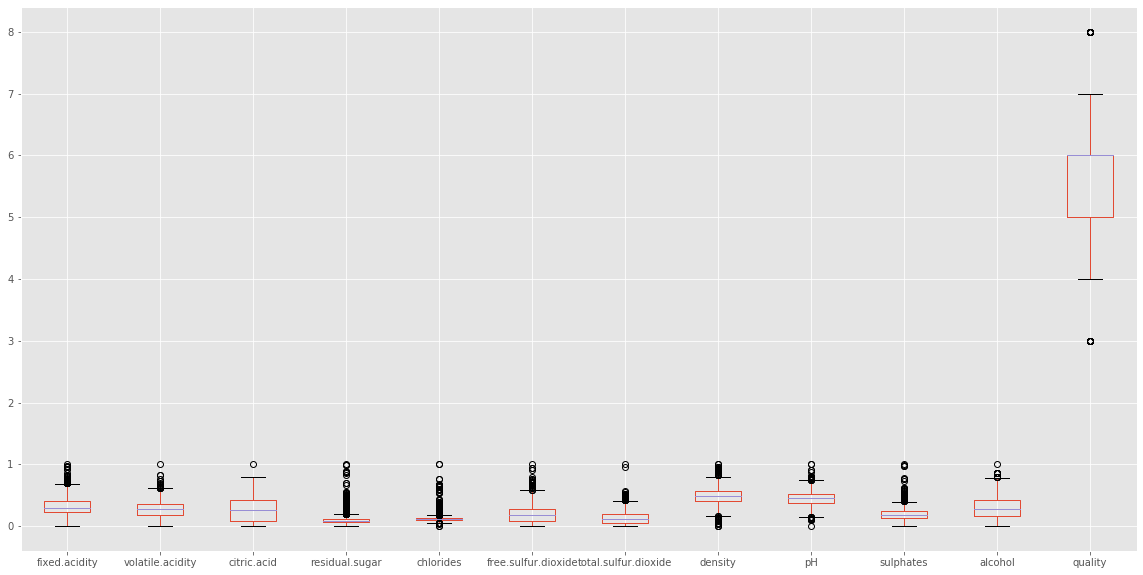

In [135]:
df.boxplot(figsize=(20,10) )

In [12]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


De los anteriores podemos ver que: residual sugar, free sulfur dioxide y total sulfur dioxido presentan valores  extremos, pero parecen ser bastantes y por tanto decidimos continuar el momento dado que esa agrupación de valores extremos pueden pertencer a una calidad en especial (Esto es una hipotesis)

## Partición de los datos en training y test

Según los siguientes elementos 

* Features: 'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol'

* Label: "quality"

In [13]:
features = df[[ 'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
label = df['quality']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(features,label, random_state=13)

In [16]:
X_train.shape

(1199, 11)

## Creación de Modelo a partir de un DecisionTreeClassifier 

In [136]:
from sklearn.tree import DecisionTreeClassifier


In [137]:
DecisionTreeModel = DecisionTreeClassifier(criterion = "gini",max_depth = 5, max_features = 1,min_samples_leaf = 3,max_leaf_nodes=18)

In [138]:
DecisionTreeModel.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=1, max_leaf_nodes=18,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [139]:
from sklearn.metrics import accuracy_score


In [140]:
DecisionTreeModel.score(X_train, Y_train)

0.5521267723102585

In [141]:
DecisionTreeModel.score(X_test, Y_test)

0.505

In [142]:
Y_predict = DecisionTreeModel.predict(X_test)


In [143]:
dt1 = accuracy_score(Y_test, Y_predict)
dt1


0.505

In [97]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=[str(e) for e in  list(range(1,11))],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'],shell = True)

0

<img src='simple_tree.png' width = 1000px heigth = 2000px>



In [115]:
training_accuracy = []
test_accuracy = []



2
max_depth_settings
2
max_features_settings
2
min_samples_leaf_settings
3
max_leaf_nodes_settings
3
max_depth_settings
3
max_features_settings
3
min_samples_leaf_settings
4
max_leaf_nodes_settings


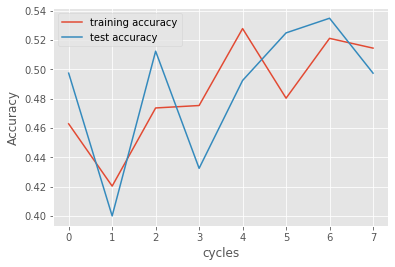

In [144]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

training_accuracy = []
test_accuracy = []


max_depth_settings = range(1, 20)

# for n_neighbors in neighbors_settings:
#     # se construye el modelo de clasificacion
#     clf = KNeighborsClassifier(n_neighbors=n_neighbors)
#     clf.fit(X_train, Y_train)
#     # se almacena el "training set accuracy"
#     training_accuracy.append(clf.score(X_train, Y_train))
#     # se almacena la "generalization accuracy"
#     test_accuracy.append(clf.score(X_test, Y_test))
# plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
# plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("n_neighbors")
# plt.legend()

done = False
parameters = {
"max_depth_settings" : 1,
"max_features_settings" : 1,
"min_samples_leaf_settings" : 1,
"max_leaf_nodes_settings" : 2
    
    
}
while not done:
    for key in parameters:
        DecisionTreeModel = DecisionTreeClassifier(criterion = "gini",max_depth = parameters["max_depth_settings"], 
                                                   max_features = parameters["max_features_settings"],
                                                   min_samples_leaf = parameters["min_samples_leaf_settings"],
                                                   max_leaf_nodes=parameters["max_leaf_nodes_settings"])
        DecisionTreeModel.fit(X_train, Y_train)
        # se almacena el "training set accuracy"
        training_accuracy.append(DecisionTreeModel.score(X_train, Y_train))
        # se almacena la "generalization accuracy"
        test_accuracy.append(DecisionTreeModel.score(X_test, Y_test))
        
        parameters[key] += 1
        print (parameters[key])
        print(key)
        
    if len(training_accuracy)>2 and (training_accuracy[-1]< training_accuracy[-2] and test_accuracy[-1]<test_accuracy[-2]):
        done = True

#  plt.plot(list(range(1,parameters['max_depth_settings'])), training_accuracy, label="training accuracy")
# plt.plot(list(range(1,parameters['max_depth_settings'])), test_accuracy, label="test accuracy")
plt.plot(training_accuracy, label="training accuracy")
plt.plot(test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("cycles")
plt.legend()

In [25]:
[str(e) for e in  list(range(1,11))]

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

## Modelo utilizando KneighborsClassifier


In [145]:
from sklearn.neighbors import KNeighborsClassifier

In [146]:
training_accuracy = []
test_accuracy = []

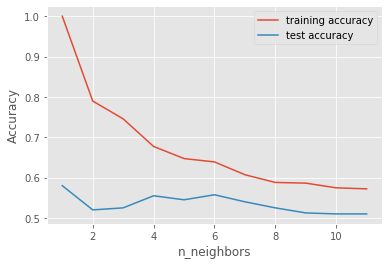

In [147]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

neighbors_settings = range(1, 12)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, Y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, Y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, Y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Modelo utilizando RandomForest


In [148]:
from sklearn.ensemble import RandomForestClassifier


In [149]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=4,min_samples_split=15,n_estimators=500, max_depth= None, random_state=10)


In [150]:
RandomForestModel.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [151]:
Y_predict = RandomForestModel.predict(X_test)


In [152]:
rf = accuracy_score(Y_test,Y_predict)
rf

0.635

In [153]:
from sklearn.tree import export_graphviz
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=features.columns,impurity=False,class_names=[str(e) for e in  list(range(1,11))],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'],shell = True)

0

<img src='complete_tree.png' width = 1000px>



## Metodos de ensamble

Aqui tenemos que explicar que son los metodos de ensamble 

Los módelos por ensamble se refieren a aquellos que combinan varios metodos, ya sea diferentes o de los mismos con el fin de mejorar y optimizar la solución que se desea, en estos casos especificos la clasificación. (Zhang & Ma, 2012). Además como explican Zhang & Ma (2012) se basa en un principio de consulta entre los metodos para llegar a la mejor decisión posible. 

Siguiendo con los autores Zhang & Ma (2012), la meta de estos sistemas create varios clasificadores con bias similares en donde se combinan sus salidas por medio de una media para reducir la varianza.

In [154]:
from sklearn.ensemble import BaggingClassifier

In [155]:
BaggingClassifierModel = BaggingClassifier(max_samples = 10, n_estimators = 500)

In [156]:
BaggingClassifierModel.fit(X_train, Y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=10, n_estimators=500,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [157]:
bagclass = accuracy_score(Y_test,Y_predict)
bagclass 

0.635

Ante varias pruebas consideramos con los datos 'puros' se procede a escalar los valores del dataset 

In [158]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[[ 'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']] =scaler.fit_transform(df[[ 'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']])


# Referencias

Zhang, C., Ma, Y.(2012). Ensemble machine learning: methods and applications. Springer Science & Business Media.